# Week 2: Probability Fundamentals - Exercises

**Goal**: Build a solid intuition for probability, conditional probability, and Bayes' theorem through hands-on implementation.

**Milestone**: Can explain what P(A|B) means and compute it manually.

**Key Resources for this week**:
- StatQuest: Probability vs. Likelihood
- StatQuest: Bayes' Theorem
- 3Blue1Brown: Bayes theorem (visual intuition)
- Naked Statistics chapters 5-7
- ISLR Chapter 2

---

In [1]:
# Setup - Run this first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

np.random.seed(42)
plt.style.use('seaborn-v0_8-whitegrid')

---

## Part 1: Probability Basics

### Exercise 1.1: Empirical vs. Theoretical Probability

One of the most fundamental ideas in probability: as you run more trials, the empirical (observed) probability converges to the theoretical probability.

**Task**: Simulate coin flips and show how the proportion of heads converges to 0.5.

In [3]:
np.cumsum(np.random.binomial(1, 0.5, 50))

array([ 1,  2,  3,  4,  5,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  8,  8,
        9,  9, 10, 11, 11, 11, 12, 13, 14, 15, 15, 15, 15, 16, 17, 17, 17,
       17, 17, 18, 19, 20, 20, 20, 21, 22, 23, 24, 24, 25, 25, 25, 25])

[0.         0.         0.33333333 ... 0.5005001  0.50055006 0.5006    ]


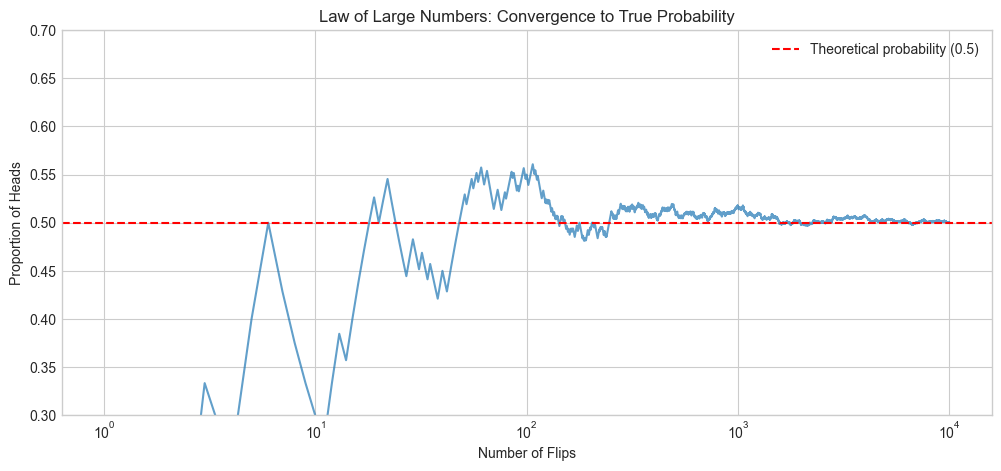

After 100 flips: 0.550
After 1000 flips: 0.517
After 10000 flips: 0.501


In [8]:
def simulate_coin_flips(n_flips, p_heads=0.5):
    """
    Simulate n coin flips and return the running proportion of heads.
    
    Returns:
        Array of length n_flips where element i is the proportion of heads
        after i+1 flips.
    """

    cum_heads = np.cumsum(np.random.binomial(1, p_heads, n_flips))
    n_flips_array = np.arange(1, n_flips + 1)
    return cum_heads / n_flips_array

# Simulate and visualize
n_flips = 10000
running_proportions = simulate_coin_flips(n_flips)
print(running_proportions)
plt.figure(figsize=(12, 5))
plt.plot(range(1, n_flips + 1), running_proportions, alpha=0.7)
plt.axhline(y=0.5, color='r', linestyle='--', label='Theoretical probability (0.5)')
plt.xscale('log')  # Log scale to see early convergence better
plt.xlabel('Number of Flips')
plt.ylabel('Proportion of Heads')
plt.title('Law of Large Numbers: Convergence to True Probability')
plt.legend()
plt.ylim(0.3, 0.7)
plt.show()

print(f"After 100 flips: {running_proportions[99]:.3f}")
print(f"After 1000 flips: {running_proportions[999]:.3f}")
print(f"After 10000 flips: {running_proportions[9999]:.3f}")

### Exercise 1.2: Joint and Marginal Probabilities

Let's work with a concrete dataset to understand joint and marginal probabilities.

**Scenario**: A company tracks employee data including department and whether they work remotely.

In [9]:
# Create a dataset of 1000 employees
np.random.seed(42)

n_employees = 1000

# Departments with different sizes
departments = np.random.choice(
    ['Engineering', 'Sales', 'Marketing', 'HR'],
    size=n_employees,
    p=[0.4, 0.3, 0.2, 0.1]  # Engineering is largest
)

# Remote work depends on department
remote_probs = {'Engineering': 0.7, 'Sales': 0.3, 'Marketing': 0.5, 'HR': 0.2}
remote = np.array([np.random.random() < remote_probs[dept] for dept in departments])

employees = pd.DataFrame({
    'department': departments,
    'remote': remote
})

print("First 10 employees:")
print(employees.head(10))
print(f"\nTotal employees: {len(employees)}")

First 10 employees:
    department  remote
0  Engineering    True
1           HR   False
2    Marketing   False
3        Sales   False
4  Engineering   False
5  Engineering    True
6  Engineering    True
7    Marketing   False
8        Sales    True
9    Marketing    True

Total employees: 1000


In [ ]:
# YOUR CODE HERE

# Task 1: Calculate MARGINAL probabilities
# P(Engineering), P(Sales), P(Marketing), P(HR)
# P(Remote), P(Not Remote)

print("Marginal Probabilities:")
print("\nP(Department):", employees.department.value_counts() / 1000)



print("\nP(Remote):", employees.remote.value_counts() / 1000)


Marginal Probabilities:

P(Department): department
Engineering    0.421
Sales          0.291
Marketing      0.188
HR             0.100
Name: count, dtype: float64

P(Remote): remote
False    0.504
True     0.496
Name: count, dtype: float64


In [32]:
# Task 2: Calculate JOINT probabilities
# P(Engineering AND Remote), P(Engineering AND Not Remote), etc.

# Create a joint probability table (also called contingency table)
# YOUR CODE HERE

# Hint: pd.crosstab can help, then divide by total
joint_counts = pd.crosstab(employees['department'], employees['remote'])
joint_probs = joint_counts / 1000

print("Joint Probability Table P(Department, Remote):")
print(joint_counts)
print("---")
print(joint_probs)

Joint Probability Table P(Department, Remote):
remote       False  True 
department               
Engineering    131    290
HR              79     21
Marketing       98     90
Sales          196     95
---
remote       False  True 
department               
Engineering  0.131  0.290
HR           0.079  0.021
Marketing    0.098  0.090
Sales        0.196  0.095


np.int64(504)

In [83]:
# Task 3: Verify the relationship between joint and marginal probabilities
# The sum of joint probabilities across one variable gives the marginal of the other

# YOUR CODE HERE
# Show that: sum of P(Dept=X, Remote=True) + P(Dept=X, Remote=False) = P(Dept=X)
# Show that: sum of P(Dept=any, Remote=True) = P(Remote=True)

print("Verification that row sums = marginal P(Department):")
for i in np.unique(departments):
    print(
        joint_probs.loc[i].sum(),
        employees.department.value_counts().loc[i] / 1000, 
        np.isclose(joint_probs.loc[i].sum() ,employees.department.value_counts().loc[i] / 1000)
        )

print("\nVerification that column sums = marginal P(Remote):")
for i in joint_probs:
    print(joint_probs[i].sum(),
          employees.remote.value_counts().loc[i] / 1000,
          np.isclose(joint_probs[i].sum(),employees.remote.value_counts().loc[i] / 1000)
          )
    

Verification that row sums = marginal P(Department):
0.421 0.421 True
0.1 0.1 True
0.188 0.188 True
0.29100000000000004 0.291 True

Verification that column sums = marginal P(Remote):
0.504 0.504 True
0.496 0.496 True


---

## Part 2: Conditional Probability

### The Key Formula:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

"The probability of A given B equals the probability of both A and B, divided by the probability of B."

### Exercise 2.1: Calculate Conditional Probabilities

In [96]:
p_engineering = employees.department.value_counts().loc["Engineering"] / 1000
p_engineering_and_remote = joint_probs.loc["Engineering"].loc[True]
p_engineering

np.float64(0.421)

In [97]:
# Using our employee dataset

# YOUR CODE HERE

# Question 1: What is P(Remote | Engineering)?
# "Given someone is in Engineering, what's the probability they're remote?"

# Method 1: Direct counting
n_engineering = employees.department.value_counts().loc["Engineering"]
n_engineering_and_remote = joint_counts.loc["Engineering"].loc[True]
p_remote_given_engineering_v1 = n_engineering_and_remote /  n_engineering

# Method 2: Using the formula P(A|B) = P(A∩B) / P(B)
p_engineering = employees.department.value_counts().loc["Engineering"] / 1000
p_engineering_and_remote = joint_probs.loc["Engineering"].loc[True]
p_remote_given_engineering_v2 = p_engineering_and_remote / p_engineering

print("P(Remote | Engineering):")
print(f"  Method 1 (direct counting): {p_remote_given_engineering_v1:.4f}")
print(f"  Method 2 (using formula): {p_remote_given_engineering_v2:.4f}")

P(Remote | Engineering):
  Method 1 (direct counting): 0.6888
  Method 2 (using formula): 0.6888


In [108]:
# Question 2: Calculate P(Remote | Department) for ALL departments

def calculate_conditional_prob(df, given_col, given_val, target_col, target_val):
    """
    Calculate P(target_col = target_val | given_col = given_val)
    """
    joint_probs = pd.crosstab(employees[given_col], employees[target_col]) / 1000

    condition = joint_probs.loc[given_val].loc[target_val]
    under = df[[given_col]].value_counts().loc[given_val] / 1000

    return condition / under

print("P(Remote=True | Department):")
for dept in ['Engineering', 'Sales', 'Marketing', 'HR']:
    prob = calculate_conditional_prob(employees, 'department', dept, 'remote', True)
    print(prob)

print("\nRecall the true probabilities we set:")
for dept, prob in remote_probs.items():
    print(f"  {dept}: {prob}")

P(Remote=True | Department):
department 
Engineering    0.688836
Name: count, dtype: float64
department
Sales         0.32646
Name: count, dtype: float64
department
Marketing     0.478723
Name: count, dtype: float64
department
HR            0.21
Name: count, dtype: float64

Recall the true probabilities we set:
  Engineering: 0.7
  Sales: 0.3
  Marketing: 0.5
  HR: 0.2


### Exercise 2.2: The Difference Between P(A|B) and P(B|A)

This is a crucial concept that many people confuse!

In [ ]:
# YOUR CODE HERE

# Calculate both:
# P(Remote | Engineering) - "Given Engineering, probability of Remote"
# P(Engineering | Remote) - "Given Remote, probability of Engineering"

p_remote_given_engineering = # TODO
p_engineering_given_remote = # TODO

print(f"P(Remote | Engineering) = {p_remote_given_engineering:.4f}")
print(f"P(Engineering | Remote) = {p_engineering_given_remote:.4f}")
print(f"\nThese are very different!")

**Question**: Explain in plain English why these two probabilities are different. What question does each one answer?

**Your answer**:
- P(Remote | Engineering) answers: 
- P(Engineering | Remote) answers: 

### Exercise 2.3: Independence

Two events A and B are **independent** if: P(A|B) = P(A)

In other words, knowing B doesn't change the probability of A.

In [ ]:
# Add a new column to our dataset: employee_id is odd or even
employees['odd_id'] = np.arange(len(employees)) % 2 == 1

# YOUR CODE HERE

# Test 1: Is 'remote' independent of 'department'?
# Check if P(Remote) ≈ P(Remote | Engineering)

p_remote = # TODO
p_remote_given_eng = # TODO

print("Test for independence between Remote and Department:")
print(f"  P(Remote) = {p_remote:.4f}")
print(f"  P(Remote | Engineering) = {p_remote_given_eng:.4f}")
print(f"  Independent? {np.isclose(p_remote, p_remote_given_eng, atol=0.05)}")

# Test 2: Is 'remote' independent of 'odd_id'?
p_remote_given_odd = # TODO

print("\nTest for independence between Remote and Odd ID:")
print(f"  P(Remote) = {p_remote:.4f}")
print(f"  P(Remote | Odd ID) = {p_remote_given_odd:.4f}")
print(f"  Independent? {np.isclose(p_remote, p_remote_given_odd, atol=0.05)}")

---

## Part 3: Bayes' Theorem

### The Formula:

$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$

Or with the law of total probability for P(B):

$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B|A) \cdot P(A) + P(B|\neg A) \cdot P(\neg A)}$$

### Exercise 3.1: Medical Testing (Classic Example)

A disease affects 1% of the population. A test for the disease has:
- 99% sensitivity (true positive rate): P(Positive | Disease) = 0.99
- 95% specificity (true negative rate): P(Negative | No Disease) = 0.95

**Question**: If someone tests positive, what's the probability they have the disease?

In [ ]:
# Given information
p_disease = 0.01  # Prior: P(Disease)
p_no_disease = 1 - p_disease  # P(No Disease)

p_positive_given_disease = 0.99  # Sensitivity
p_negative_given_no_disease = 0.95  # Specificity
p_positive_given_no_disease = 1 - p_negative_given_no_disease  # False positive rate

# YOUR CODE HERE

# Step 1: Calculate P(Positive) using law of total probability
# P(Positive) = P(Positive|Disease)P(Disease) + P(Positive|No Disease)P(No Disease)
p_positive = # TODO

# Step 2: Apply Bayes' theorem to find P(Disease | Positive)
p_disease_given_positive = # TODO

print("Medical Test Analysis:")
print(f"  Prior probability of disease: {p_disease:.2%}")
print(f"  P(Test Positive): {p_positive:.4f}")
print(f"  P(Disease | Positive Test): {p_disease_given_positive:.2%}")

**Question**: The result might surprise you! Why is P(Disease | Positive) so much lower than the test's 99% sensitivity? Explain intuitively.

**Your answer**:

In [ ]:
# Visualize with a simulation of 100,000 people

n_people = 100000

# YOUR CODE HERE
# Calculate expected counts in each category

n_with_disease = int(n_people * p_disease)
n_without_disease = n_people - n_with_disease

# Of those with disease, how many test positive?
n_true_positives = # TODO

# Of those without disease, how many test positive (false positives)?
n_false_positives = # TODO

# Total positives
n_total_positives = n_true_positives + n_false_positives

print(f"Out of {n_people:,} people:")
print(f"  {n_with_disease:,} have the disease")
print(f"  {n_without_disease:,} don't have the disease")
print(f"\nPositive tests:")
print(f"  {n_true_positives:,} true positives (actually sick)")
print(f"  {n_false_positives:,} false positives (healthy but positive test)")
print(f"  {n_total_positives:,} total positive tests")
print(f"\nOf all positive tests, {n_true_positives}/{n_total_positives} = {n_true_positives/n_total_positives:.2%} actually have the disease")

### Exercise 3.2: Implement a General Bayes Function

In [ ]:
def bayes_theorem(p_b_given_a, p_a, p_b_given_not_a):
    """
    Calculate P(A|B) using Bayes' theorem.
    
    Parameters:
        p_b_given_a: P(B|A) - likelihood
        p_a: P(A) - prior
        p_b_given_not_a: P(B|¬A)
    
    Returns:
        P(A|B) - posterior
    """
    # YOUR CODE HERE
    pass


# Test with medical example
result = bayes_theorem(
    p_b_given_a=0.99,      # P(Positive | Disease)
    p_a=0.01,              # P(Disease)
    p_b_given_not_a=0.05   # P(Positive | No Disease)
)
print(f"P(Disease | Positive) = {result:.4f}")

### Exercise 3.3: Updating Beliefs with New Evidence

Bayes' theorem is powerful for updating beliefs as new evidence arrives.

**Scenario**: Someone tests positive. Then they take a second, independent test and it's also positive. What's the probability they have the disease now?

In [ ]:
# YOUR CODE HERE

# After first positive test:
p_disease_after_first = bayes_theorem(0.99, 0.01, 0.05)
print(f"After 1st positive test: P(Disease) = {p_disease_after_first:.4f}")

# Use this as the new prior for the second test
p_disease_after_second = # TODO: Apply Bayes again with updated prior
print(f"After 2nd positive test: P(Disease) = {p_disease_after_second:.4f}")

# What about after a third positive test?
p_disease_after_third = # TODO
print(f"After 3rd positive test: P(Disease) = {p_disease_after_third:.4f}")

In [ ]:
# Visualize how probability updates with each positive test

def simulate_sequential_tests(prior, n_tests, sensitivity=0.99, false_positive_rate=0.05):
    """
    Simulate n sequential positive tests and return the posterior after each.
    """
    posteriors = [prior]
    current_prior = prior
    
    for _ in range(n_tests):
        posterior = bayes_theorem(sensitivity, current_prior, false_positive_rate)
        posteriors.append(posterior)
        current_prior = posterior
    
    return posteriors


posteriors = simulate_sequential_tests(0.01, 10)

plt.figure(figsize=(10, 5))
plt.plot(range(len(posteriors)), posteriors, 'bo-', markersize=10)
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5, label='50% threshold')
plt.axhline(y=0.95, color='g', linestyle='--', alpha=0.5, label='95% threshold')
plt.xlabel('Number of Positive Tests')
plt.ylabel('P(Disease)')
plt.title('Belief Update with Sequential Positive Tests')
plt.legend()
plt.ylim(-0.05, 1.05)
plt.xticks(range(len(posteriors)))
plt.grid(True, alpha=0.3)
plt.show()

# Find how many tests needed for >95% confidence
for i, p in enumerate(posteriors):
    if p > 0.95:
        print(f"Need {i} positive tests to reach >95% confidence")
        break

---

## Part 4: Build a Naive Bayes Spam Classifier (From Scratch!)

This is the hands-on project from your study plan: "Implement Bayes' theorem from scratch for a simple spam classifier (just the math, no sklearn)"

### How Naive Bayes Classification Works:

Given a message with words $w_1, w_2, ..., w_n$, we want to find:

$$P(Spam | w_1, w_2, ..., w_n)$$

Using Bayes:

$$P(Spam | words) \propto P(words | Spam) \cdot P(Spam)$$

The "naive" assumption: words are independent given the class:

$$P(words | Spam) = P(w_1|Spam) \cdot P(w_2|Spam) \cdot ... \cdot P(w_n|Spam)$$

### Exercise 4.1: Create Training Data

In [ ]:
# Training data: labeled emails
training_data = [
    # (message, is_spam)
    ("free money now", True),
    ("win free lottery prize", True),
    ("click here for free offer", True),
    ("urgent action required free money", True),
    ("free free free winner", True),
    ("claim your prize now", True),
    ("limited time offer free", True),
    ("congratulations you won", True),
    ("meeting tomorrow at noon", False),
    ("can we discuss the project", False),
    ("here is the report you requested", False),
    ("lunch meeting on friday", False),
    ("please review the attached document", False),
    ("quarterly report is ready", False),
    ("team meeting at three", False),
    ("project deadline reminder", False),
    ("budget review meeting", False),
    ("status update on project", False),
]

print(f"Training set: {len(training_data)} emails")
print(f"  Spam: {sum(1 for _, is_spam in training_data if is_spam)}")
print(f"  Not spam: {sum(1 for _, is_spam in training_data if not is_spam)}")

### Exercise 4.2: Calculate Prior Probabilities

In [ ]:
# YOUR CODE HERE

# Calculate P(Spam) and P(Not Spam)
n_spam = # TODO
n_not_spam = # TODO
n_total = len(training_data)

p_spam = # TODO
p_not_spam = # TODO

print(f"Prior probabilities:")
print(f"  P(Spam) = {p_spam:.4f}")
print(f"  P(Not Spam) = {p_not_spam:.4f}")

### Exercise 4.3: Calculate Word Likelihoods

For each word, we need:
- P(word | Spam): How often does this word appear in spam?
- P(word | Not Spam): How often does this word appear in not-spam?

**Important**: We'll use Laplace smoothing to handle words that might not appear in one class:

$$P(word|class) = \frac{count(word, class) + 1}{total\_words\_in\_class + vocabulary\_size}$$

In [ ]:
def tokenize(message):
    """Simple tokenization: lowercase and split on spaces."""
    return message.lower().split()


class NaiveBayesSpamClassifier:
    def __init__(self):
        self.p_spam = 0
        self.p_not_spam = 0
        self.word_probs_spam = {}  # P(word | Spam)
        self.word_probs_not_spam = {}  # P(word | Not Spam)
        self.vocabulary = set()
    
    def train(self, training_data):
        """
        Train the classifier on labeled data.
        
        Parameters:
            training_data: List of (message, is_spam) tuples
        """
        # YOUR CODE HERE
        
        # Step 1: Calculate prior probabilities
        spam_messages = [msg for msg, is_spam in training_data if is_spam]
        not_spam_messages = [msg for msg, is_spam in training_data if not is_spam]
        
        self.p_spam = # TODO
        self.p_not_spam = # TODO
        
        # Step 2: Count word frequencies in each class
        spam_word_counts = Counter()
        not_spam_word_counts = Counter()
        
        for msg in spam_messages:
            words = tokenize(msg)
            spam_word_counts.update(words)
            self.vocabulary.update(words)
        
        for msg in not_spam_messages:
            words = tokenize(msg)
            not_spam_word_counts.update(words)
            self.vocabulary.update(words)
        
        # Step 3: Calculate P(word | class) with Laplace smoothing
        total_spam_words = sum(spam_word_counts.values())
        total_not_spam_words = sum(not_spam_word_counts.values())
        vocab_size = len(self.vocabulary)
        
        for word in self.vocabulary:
            # Laplace smoothing: (count + 1) / (total + vocab_size)
            self.word_probs_spam[word] = # TODO
            self.word_probs_not_spam[word] = # TODO
    
    def predict_proba(self, message):
        """
        Calculate P(Spam | message) and P(Not Spam | message).
        
        Returns:
            (p_spam_given_message, p_not_spam_given_message)
        """
        words = tokenize(message)
        
        # Start with log priors (we use log to avoid underflow)
        log_p_spam = np.log(self.p_spam)
        log_p_not_spam = np.log(self.p_not_spam)
        
        # Add log likelihoods for each word
        for word in words:
            if word in self.vocabulary:
                log_p_spam += np.log(self.word_probs_spam[word])
                log_p_not_spam += np.log(self.word_probs_not_spam[word])
            # If word not in vocabulary, we skip it (or could use smoothing)
        
        # Convert back from log space and normalize
        # YOUR CODE HERE
        # Use the log-sum-exp trick for numerical stability:
        # P(spam|msg) = exp(log_p_spam) / (exp(log_p_spam) + exp(log_p_not_spam))
        
        max_log = max(log_p_spam, log_p_not_spam)
        p_spam_unnorm = np.exp(log_p_spam - max_log)
        p_not_spam_unnorm = np.exp(log_p_not_spam - max_log)
        
        total = p_spam_unnorm + p_not_spam_unnorm
        
        return p_spam_unnorm / total, p_not_spam_unnorm / total
    
    def predict(self, message):
        """Predict whether message is spam."""
        p_spam, p_not_spam = self.predict_proba(message)
        return p_spam > p_not_spam

In [ ]:
# Train the classifier
classifier = NaiveBayesSpamClassifier()
classifier.train(training_data)

print("Classifier trained!")
print(f"Vocabulary size: {len(classifier.vocabulary)}")
print(f"\nSample word probabilities:")
for word in ['free', 'meeting', 'project', 'money']:
    if word in classifier.vocabulary:
        print(f"  '{word}': P(word|spam)={classifier.word_probs_spam[word]:.4f}, P(word|not_spam)={classifier.word_probs_not_spam[word]:.4f}")

### Exercise 4.4: Test the Classifier

In [ ]:
# Test messages
test_messages = [
    "free money for you",
    "meeting about the project tomorrow",
    "you won a free prize",
    "please review the budget report",
    "click here now winner",
    "team lunch on friday",
    "free offer limited time",
    "quarterly review meeting"
]

print("Predictions:")
print("=" * 60)
for msg in test_messages:
    p_spam, p_not_spam = classifier.predict_proba(msg)
    prediction = "SPAM" if classifier.predict(msg) else "NOT SPAM"
    print(f"{msg[:40]:<40} | P(spam)={p_spam:.2%} | {prediction}")

### Exercise 4.5: Analyze Which Words Are Most "Spammy"

Calculate the ratio P(word|spam) / P(word|not_spam) for each word to find the strongest spam indicators.

In [ ]:
# YOUR CODE HERE

# Calculate spam ratio for each word
word_spam_ratios = {}
for word in classifier.vocabulary:
    ratio = # TODO: P(word|spam) / P(word|not_spam)
    word_spam_ratios[word] = ratio

# Sort by ratio
sorted_words = sorted(word_spam_ratios.items(), key=lambda x: x[1], reverse=True)

print("Most 'spammy' words (high P(word|spam) / P(word|not_spam) ratio):")
for word, ratio in sorted_words[:10]:
    print(f"  {word}: {ratio:.2f}x more likely in spam")

print("\nLeast 'spammy' words (low ratio):")
for word, ratio in sorted_words[-10:]:
    print(f"  {word}: {1/ratio:.2f}x more likely in not-spam")

---

## Part 5: Calculate Conditional Probabilities on Real Data

### Exercise 5.1: Work with a Real Dataset

Let's use a dataset with multiple categorical variables and practice calculating various conditional probabilities.

In [ ]:
# Create a dataset simulating customer behavior
np.random.seed(42)
n_customers = 5000

# Customer attributes
age_group = np.random.choice(['18-25', '26-35', '36-50', '50+'], n_customers, p=[0.2, 0.35, 0.3, 0.15])
membership = np.random.choice(['Free', 'Basic', 'Premium'], n_customers, p=[0.5, 0.35, 0.15])

# Purchase behavior depends on age and membership
def get_purchase_prob(age, mem):
    base = 0.1
    if age == '26-35' or age == '36-50':
        base += 0.1
    if mem == 'Basic':
        base += 0.15
    elif mem == 'Premium':
        base += 0.35
    return min(base, 0.9)

made_purchase = np.array([np.random.random() < get_purchase_prob(a, m) 
                          for a, m in zip(age_group, membership)])

customers = pd.DataFrame({
    'age_group': age_group,
    'membership': membership,
    'made_purchase': made_purchase
})

print("Customer Dataset:")
print(customers.head(10))
print(f"\nTotal customers: {len(customers)}")
print(f"Purchase rate: {customers['made_purchase'].mean():.2%}")

In [ ]:
# YOUR CODE HERE

# Question 1: What is P(Purchase | Premium membership)?
p_purchase_given_premium = # TODO
print(f"P(Purchase | Premium) = {p_purchase_given_premium:.4f}")

# Question 2: What is P(Premium | Purchase)?
p_premium_given_purchase = # TODO
print(f"P(Premium | Purchase) = {p_premium_given_purchase:.4f}")

# Question 3: Calculate P(Purchase | Age Group) for all age groups
print("\nP(Purchase | Age Group):")
for age in ['18-25', '26-35', '36-50', '50+']:
    p = # TODO
    print(f"  {age}: {p:.4f}")

# Question 4: What is P(Purchase | Premium AND 26-35)?
p_purchase_given_premium_and_2635 = # TODO
print(f"\nP(Purchase | Premium AND 26-35) = {p_purchase_given_premium_and_2635:.4f}")

### Exercise 5.2: Verify Bayes' Theorem with Real Data

Use the customer data to verify that Bayes' theorem gives the same answer as direct calculation.

In [ ]:
# We'll verify P(Premium | Purchase) using Bayes' theorem

# YOUR CODE HERE

# Direct calculation (already done above)
direct_result = p_premium_given_purchase

# Using Bayes: P(Premium|Purchase) = P(Purchase|Premium) * P(Premium) / P(Purchase)
p_purchase_given_premium = # TODO
p_premium = # TODO  
p_purchase = # TODO

bayes_result = # TODO

print("Verifying Bayes' Theorem:")
print(f"  Direct calculation: P(Premium|Purchase) = {direct_result:.6f}")
print(f"  Using Bayes' theorem: P(Premium|Purchase) = {bayes_result:.6f}")
print(f"  Match: {np.isclose(direct_result, bayes_result)}")

---

## Part 6: Probability vs. Likelihood

This is an important distinction that StatQuest covers well.

- **Probability**: Given a distribution with known parameters, what's the chance of seeing certain data?
- **Likelihood**: Given the data, how likely is it that the data came from a distribution with certain parameters?

### Exercise 6.1: Understanding the Difference

In [ ]:
from scipy import stats

# Probability question:
# "If heights are normally distributed with mean=170, std=10,
#  what's the probability of someone being between 165 and 175?"

prob = stats.norm.cdf(175, loc=170, scale=10) - stats.norm.cdf(165, loc=170, scale=10)
print(f"Probability of height between 165-175 (given μ=170, σ=10): {prob:.4f}")

# Likelihood question:
# "Given we observed heights [168, 172, 169, 175, 171],
#  how likely is it that μ=170 (vs μ=165)?"

observed_heights = np.array([168, 172, 169, 175, 171])

# Calculate likelihood for different means
def log_likelihood(data, mean, std=10):
    """Calculate log-likelihood of data under Normal(mean, std)."""
    return np.sum(stats.norm.logpdf(data, loc=mean, scale=std))

ll_mean_170 = log_likelihood(observed_heights, mean=170)
ll_mean_165 = log_likelihood(observed_heights, mean=165)
ll_mean_175 = log_likelihood(observed_heights, mean=175)

print(f"\nLog-likelihood of observed data:")
print(f"  If μ=165: {ll_mean_165:.2f}")
print(f"  If μ=170: {ll_mean_170:.2f}")
print(f"  If μ=175: {ll_mean_175:.2f}")
print(f"\nMost likely μ among these: 170 (highest log-likelihood)")

In [ ]:
# Visualize likelihood as a function of the mean parameter

means = np.linspace(160, 180, 100)
log_likelihoods = [log_likelihood(observed_heights, m) for m in means]

plt.figure(figsize=(10, 5))
plt.plot(means, log_likelihoods)
plt.axvline(x=np.mean(observed_heights), color='r', linestyle='--', 
            label=f'Sample mean = {np.mean(observed_heights):.1f}')
plt.xlabel('Mean (μ)')
plt.ylabel('Log-Likelihood')
plt.title('Likelihood of Different Means Given Observed Data')
plt.legend()
plt.show()

# Maximum likelihood estimate
mle_mean = means[np.argmax(log_likelihoods)]
print(f"Maximum Likelihood Estimate of μ: {mle_mean:.1f}")
print(f"Sample mean: {np.mean(observed_heights):.1f}")
print("(They should be equal for the normal distribution!)")

**Question**: In your own words, explain the difference between probability and likelihood.

**Your answer**:
- Probability: 
- Likelihood: 

---

## Week 2 Milestone Check

### Exercise: Explain P(A|B) and Compute It

This is your Week 2 milestone! Complete this without looking anything up.

**Part 1: Explain in your own words**

What does P(A|B) mean? Provide a concrete example.

**Your explanation**:

**Part 2: Compute it manually**

Given the following data about students:
- 60% of students study computer science (CS)
- 30% of students are in the honors program
- 20% of students are both CS majors AND in the honors program

Calculate:
1. P(Honors | CS) - Given a student is CS, what's the probability they're in honors?
2. P(CS | Honors) - Given a student is in honors, what's the probability they're CS?

In [ ]:
# YOUR CODE HERE

# Given:
p_cs = 0.60
p_honors = 0.30
p_cs_and_honors = 0.20

# Calculate:
p_honors_given_cs = # TODO: Use the formula P(A|B) = P(A∩B) / P(B)
p_cs_given_honors = # TODO

print(f"P(Honors | CS) = {p_honors_given_cs:.4f}")
print(f"P(CS | Honors) = {p_cs_given_honors:.4f}")

# Interpretation:
print(f"\nInterpretation:")
print(f"  {p_honors_given_cs:.1%} of CS students are in the honors program")
print(f"  {p_cs_given_honors:.1%} of honors students are CS majors")

---

## Bonus Challenges

### Bonus 1: Monty Hall Problem

Simulate the famous Monty Hall problem and prove that switching is the better strategy.

In [ ]:
def monty_hall_simulation(n_games=10000, switch=True):
    """
    Simulate the Monty Hall problem.
    
    Rules:
    1. There are 3 doors, one has a car, two have goats
    2. You pick a door
    3. Monty opens a door with a goat (not your door, not the car door)
    4. You can switch to the other unopened door or stay
    
    Parameters:
        n_games: Number of games to simulate
        switch: If True, always switch; if False, always stay
    
    Returns:
        Win rate
    """
    # YOUR CODE HERE
    pass


# Run simulations
n_games = 100000
win_rate_stay = monty_hall_simulation(n_games, switch=False)
win_rate_switch = monty_hall_simulation(n_games, switch=True)

print(f"Monty Hall Simulation ({n_games:,} games):")
print(f"  Win rate if you STAY:   {win_rate_stay:.2%}")
print(f"  Win rate if you SWITCH: {win_rate_switch:.2%}")
print(f"\nSwitching is {win_rate_switch/win_rate_stay:.1f}x better!")

### Bonus 2: Extend the Spam Classifier

Improve the Naive Bayes classifier by:
1. Adding more training data
2. Implementing bigrams (pairs of consecutive words)
3. Adding a `score_importance` method that shows which words most influenced a prediction

In [ ]:
# YOUR CODE HERE - Extend the classifier
pass

---

## Week 2 Checkpoint

Before moving to Week 3, make sure you can:

- [ ] Calculate joint, marginal, and conditional probabilities from a dataset
- [ ] **Explain what P(A|B) means and compute it manually** (MILESTONE!)
- [ ] Explain why P(A|B) ≠ P(B|A) with a concrete example
- [ ] Apply Bayes' theorem to update probabilities with new evidence
- [ ] Explain the medical testing paradox (why positive test ≠ high probability of disease)
- [ ] Implement a simple Naive Bayes classifier from scratch
- [ ] Explain the difference between probability and likelihood

---

**Great work completing Week 2! 🎉**

Next week: Hypothesis Testing & P-values